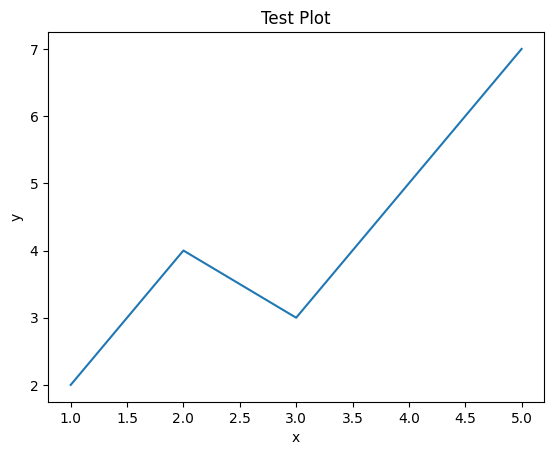

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create simple data
data = pd.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [2, 4, 3, 5, 7]
})

sns.lineplot(data=data, x="x", y="y")
plt.title("Test Plot")
plt.show()


In [ ]:
from __future__ import annotations

import os
import shutil
from pathlib import Path


# ==== PARAMETERS (SET THESE BEFORE RUNNING) ==================================
SEARCH_ROOTS = [
    Path(r"-"),
    Path(r"-"),
]

# Search by BASE NAME (stem). Example:
# - If TARGET_BASENAME = "report", matches: report.pdf, report.jpg, report.$pdf, report.pdf:tis, ...
TARGET_BASENAME = "251217_302064_fortop BE_MO.1"  # <-- set your base name here

# Allowed extensions (case-insensitive), WITHOUT the dot.
# Examples you gave: PDF, JPG, $PDF, ATT, ERR, PDF:TIS
ALLOWED_EXTENSIONS = {
    "PDF",
    "JPG",
    "$PDF",
    "ATT",
    "ERR",
    "PDF:TIS",
}

DEST_FOLDER = Path(r"C:\Temp\ToImport")

DRY_RUN = True      # True: do NOT copy/delete (only list results) | False: copy then delete
MAX_RESULTS = 50    # stop after this many matches

SKIP_DIR_NAMES = {
    "$Recycle.Bin",
    "System Volume Information",
    ".git",
    "node_modules",
    "__pycache__",
}
# ============================================================================


def split_basename_and_ext(filename: str) -> tuple[str, str]:
    """
    Splits a filename into:
      - basename: everything before the last dot
      - ext: everything after the last dot (can include ':' like 'PDF:TIS')
    If there's no dot, ext will be "".

    Examples:
      "abc.pdf"       -> ("abc", "pdf")
      "abc.pdf:tis"   -> ("abc", "pdf:tis")
      "abc"           -> ("abc", "")
    """
    if "." not in filename:
        return filename, ""
    base, ext = filename.rsplit(".", 1)
    return base, ext


def iter_matching_files(root: Path, target_basename: str, allowed_exts: set[str]):
    """
    Fast scan using os.walk:
    - Match by basename AND extension.
    - No Path creation unless a match is found.
    """
    target_base_cmp = target_basename.lower()
    allowed_cmp = {e.lower() for e in allowed_exts}

    for dirpath, dirnames, filenames in os.walk(root):
        if SKIP_DIR_NAMES:
            dirnames[:] = [d for d in dirnames if d not in SKIP_DIR_NAMES]

        for fn in filenames:
            base, ext = split_basename_and_ext(fn)
            if base.lower() != target_base_cmp:
                continue
            if ext.lower() not in allowed_cmp:
                continue

            yield Path(dirpath) / fn


def unique_dest_path(dest_dir: Path, src: Path) -> Path:
    """
    Avoid overwriting: if a file exists in DEST_FOLDER, append _1, _2, ...
    Works even for weird extensions like ".pdf:tis" because we use the whole name.
    """
    dest_dir.mkdir(parents=True, exist_ok=True)
    candidate = dest_dir / src.name
    i = 1
    while candidate.exists():
        candidate = dest_dir / f"{src.stem}_{i}{src.suffix}"
        # Note: for odd names, src.suffix may be only the last portion after a dot;
        # but src.name uniqueness is already handled above. This fallback is acceptable.
        i += 1
    return candidate


def main() -> None:
    roots = [r for r in SEARCH_ROOTS if r.exists() and r.is_dir()]
    if not roots:
        return

    matches: list[Path] = []
    for root in roots:
        for p in iter_matching_files(root, TARGET_BASENAME, ALLOWED_EXTENSIONS):
            matches.append(p)
            if len(matches) >= MAX_RESULTS:
                break
        if len(matches) >= MAX_RESULTS:
            break

    # Output: full paths only
    for p in matches:
        print(str(p))

    if DRY_RUN:
        return

    # Copy then delete (only delete if copy succeeds)
    for p in matches:
        try:
            dest_path = unique_dest_path(DEST_FOLDER, p)
            shutil.copy2(p, dest_path)
        except Exception:
            continue

        try:
            p.unlink()
        except Exception:
            pass


if __name__ == "__main__":
    main()


In [ ]:
from __future__ import annotations
import os
import shutil
from pathlib import Path
 
 
# ==== PARAMETERS (SET THESE BEFORE RUNNING) ==================================
SEARCH_ROOTS = [
    Path(r"E:\d3_Import\D3P"),
    Path(r"E:\d3_Share\D3P"),
    Path(r"E:\d3_Work\D3P")
]
 
# Search by BASE NAME (stem). Example:
# - If TARGET_BASENAME = "report", matches: report.pdf, report.jpg, report.$pdf, report.pdf:tis, ...
TARGET_BASENAME = "260205_300199_Eisenbeiss_GT"  # <-- set your base name here
 
# Allowed extensions (case-insensitive), WITHOUT the dot.
# Examples you gave: PDF, JPG, $PDF, ATT, ERR, PDF:TIS
ALLOWED_EXTENSIONS = {
    "pdf",
    "err",
    "jpl",
    "$pdf",
    "att",
    "pdf.tis",
    "pdf:tis",
}
 
DEST_FOLDER = Path(r"C:\Temp\ToImport")
 
DRY_RUN = True     # True: do NOT copy/delete (only list results) | False: copy then delete
MAX_RESULTS = 50    # stop after this many matches
 
SKIP_DIR_NAMES = {
    "$Recycle.Bin",
    "System Volume Information",
    ".git",
    "node_modules",
    "__pycache__",
}
# ============================================================================
 
 
def split_basename_and_ext(filename: str) -> tuple[str, str]:
    """
    Splits a filename into:
      - basename: everything before the last dot
      - ext: everything after the last dot (can include ':' like 'PDF:TIS')
    If there's no dot, ext will be "".
 
    Examples:
      "abc.pdf"       -> ("abc", "pdf")
      "abc.pdf:tis"   -> ("abc", "pdf:tis")
      "abc"           -> ("abc", "")
    """
    if "." not in filename:
        return filename, ""
    base, ext = filename.rsplit(".", 1)
    return base, ext
 
 
def iter_matching_files(root: Path, target_basename: str, allowed_exts: set[str]):
    """
    Fast scan using os.walk:
    - Match by basename AND extension.
    - No Path creation unless a match is found.
    """
    target_base_cmp = target_basename.lower()
    allowed_cmp = {e.lower() for e in allowed_exts}
 
    for dirpath, dirnames, filenames in os.walk(root):
        if SKIP_DIR_NAMES:
            dirnames[:] = [d for d in dirnames if d not in SKIP_DIR_NAMES]
 
        for fn in filenames:
            base, ext = split_basename_and_ext(fn)
            if base.lower() != target_base_cmp:
                continue
            if ext.lower() not in allowed_cmp:
                continue
 
            yield Path(dirpath) / fn
 
 
def unique_dest_path(dest_dir: Path, src: Path) -> Path:
    """
    Avoid overwriting: if a file exists in DEST_FOLDER, append _1, _2, ...
    Works even for weird extensions like ".pdf:tis" because we use the whole name.
    """
    dest_dir.mkdir(parents=True, exist_ok=True)
    candidate = dest_dir / src.name
    i = 1
    while candidate.exists():
        candidate = dest_dir / f"{src.stem}_{i}{src.suffix}"
        # Note: for odd names, src.suffix may be only the last portion after a dot;
        # but src.name uniqueness is already handled above. This fallback is acceptable.
        i += 1
    return candidate
 
 
def main() -> None:
    roots = [r for r in SEARCH_ROOTS if r.exists() and r.is_dir()]
    if not roots:
        return
 
    matches: list[Path] = []
    for root in roots:
        for p in iter_matching_files(root, TARGET_BASENAME, ALLOWED_EXTENSIONS):
            matches.append(p)
            if len(matches) >= MAX_RESULTS:
                break
        if len(matches) >= MAX_RESULTS:
            break
 
    # Output: full paths only
    for p in matches:
        print(str(p))
 
    if DRY_RUN:
        return
 
    # Copy then delete (only delete if copy succeeds)
    for p in matches:
        try:
            dest_path = unique_dest_path(DEST_FOLDER, p)
            shutil.copy2(p, dest_path)
        except Exception:
            continue
 
        try:
            p.unlink()
        except Exception:
            pass
 
 
if __name__ == "__main__":
    main()

In [ ]:
import os
from pathlib import Path


MAIN_FOLDERS = [
    r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie",
    r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)",
    # r"C:\Path\To\MainFolder3",
]

# Set to True to only *show* what would be deleted.
# Set to False to actually delete the PDF files.
DRY_RUN = False
# ============================================================================ #


def get_most_recent_subfolder(folder: Path) -> Path | None:
    if not folder.exists() or not folder.is_dir():
        print(f"[WARN] Folder does not exist or is not a directory: {folder}")
        return None

    subfolders = [f for f in folder.iterdir() if f.is_dir()]
    if not subfolders:
        print(f"[INFO] No subfolders found in: {folder}")
        return None

    # Choose the folder with the latest creation time
    most_recent = max(subfolders, key=lambda p: p.stat().st_ctime)
    return most_recent


def delete_pdfs_in_folder(folder: Path, dry_run: bool = True) -> None:
    if not folder.exists() or not folder.is_dir():
        print(f"[WARN] Target is not a folder: {folder}")
        return

    pdf_files = [f for f in folder.iterdir()
                 if f.is_file() and f.suffix.lower() == ".pdf"]

    if not pdf_files:
        print(f"[INFO] No PDF files found in: {folder}")
        return

    print(f"[INFO] Found {len(pdf_files)} PDF file(s) in: {folder}")

    for pdf in pdf_files:
        if dry_run:
            print(f"  [DRY RUN] Would delete: {pdf}")
        else:
            try:
                pdf.unlink()
                print(f"  [DELETED] {pdf}")
            except Exception as e:
                print(f"  [ERROR] Could not delete {pdf}: {e}")


def process_main_folder(main_folder_str: str, dry_run: bool = True) -> None:
    main_folder = Path(main_folder_str)
    print("\n" + "=" * 70)
    print(f"[PROCESSING] Main folder: {main_folder}")

    recent_subfolder = get_most_recent_subfolder(main_folder)
    if recent_subfolder is None:
        print(f"[INFO] Skipping {main_folder} (no valid subfolders).")
        return

    print(f"[INFO] Most recent subfolder: {recent_subfolder}")
    delete_pdfs_in_folder(recent_subfolder, dry_run=dry_run)


def main():
    if not MAIN_FOLDERS:
        print("[ERROR] No main folders configured in MAIN_FOLDERS.")
        return

    print(f"DRY_RUN is set to {DRY_RUN}.")
    if DRY_RUN:
        print("No files will actually be deleted.\n")

    for folder in MAIN_FOLDERS:
        process_main_folder(folder, dry_run=DRY_RUN)


if __name__ == "__main__":
    main()


DRY_RUN is set to True.
No files will actually be deleted.


[PROCESSING] Main folder: C:\Users\A.Abbas\Downloads\X2Kopie(2)
[INFO] Most recent subfolder: C:\Users\A.Abbas\Downloads\X2Kopie(2)\X1KopieKopie
[INFO] Found 2 PDF file(s) in: C:\Users\A.Abbas\Downloads\X2Kopie(2)\X1KopieKopie
  [DRY RUN] Would delete: C:\Users\A.Abbas\Downloads\X2Kopie(2)\X1KopieKopie\Lernkarten_Bestellung - Kopie.pdf
  [DRY RUN] Would delete: C:\Users\A.Abbas\Downloads\X2Kopie(2)\X1KopieKopie\Lernkarten_Bestellung.pdf

[PROCESSING] Main folder: C:\Users\A.Abbas\Downloads\X2Kopie
[INFO] Most recent subfolder: C:\Users\A.Abbas\Downloads\X2Kopie\X1KopieKopie
[INFO] Found 5 PDF file(s) in: C:\Users\A.Abbas\Downloads\X2Kopie\X1KopieKopie
  [DRY RUN] Would delete: C:\Users\A.Abbas\Downloads\X2Kopie\X1KopieKopie\Lernkarten_Bestellung - Kopie (2).pdf
  [DRY RUN] Would delete: C:\Users\A.Abbas\Downloads\X2Kopie\X1KopieKopie\Lernkarten_Bestellung - Kopie (3).pdf
  [DRY RUN] Would delete: C:\Users\A.Abbas\Downloads\X2

In [ ]:
from __future__ import annotations

import os
from dataclasses import dataclass
from datetime import datetime
from pathlib import Path


# ==== CONFIG ================================================================
SEARCH_ROOTS = [
    #Path(r"E:\d3_Import\D3P"),
    #Path(r"E:\d3_Share\D3P"),
    #Path(r"E:\d3_Work\D3P"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)")
]

DRY_RUN = True        # True: show only | False: delete after confirmation
MATCH_STEM = True     # True: "xyz" matches xyz.pdf, xyz.docx | False: exact name only
MAX_RESULTS = 50    # safety cap
DEFAULT_FILENAME = "Lernkarten_Bestellung"
# ===========================================================================


@dataclass(frozen=True)
class Match:
    path: Path
    size_bytes: int
    mtime: float


def normalize_query(q: str) -> str:
    return q.strip().strip('"').strip("'")


def build_matcher(query: str):
    q = query
    q_lower = q.lower()

    def matches(p: Path) -> bool:
        name = p.name.lower()
        stem = p.stem.lower()

        if not MATCH_STEM:
            return name == q_lower

        # MATCH_STEM=True:
        if "." in q:
            return name == q_lower  # exact filename
        return stem == q_lower      # match by stem

    return matches


def format_bytes(n: int) -> str:
    units = ["B", "KB", "MB", "GB", "TB"]
    size = float(n)
    for u in units:
        if size < 1024 or u == units[-1]:
            return f"{size:.1f} {u}" if u != "B" else f"{int(size)} {u}"
        size /= 1024
    return f"{n} B"


def scan_roots(roots: list[Path], query: str) -> list[Match]:
    matcher = build_matcher(query)
    results: list[Match] = []

    for root in roots:
        if not root.exists() or not root.is_dir():
            print(f"[WARN] Root not found / not a directory: {root}")
            continue

        for dirpath, _, filenames in os.walk(root):
            for fn in filenames:
                p = Path(dirpath) / fn
                if matcher(p):
                    try:
                        st = p.stat()
                        results.append(Match(path=p, size_bytes=st.st_size, mtime=st.st_mtime))
                        if len(results) >= MAX_RESULTS:
                            print(f"[WARN] Reached MAX_RESULTS={MAX_RESULTS}. Stopping early.")
                            results.sort(key=lambda m: m.mtime, reverse=True)
                            return results
                    except Exception as e:
                        print(f"[WARN] Could not stat: {p} ({e})")

    results.sort(key=lambda m: m.mtime, reverse=True)
    return results


def print_matches(matches: list[Match]) -> None:
    if not matches:
        print("[INFO] No matching files found.")
        return

    print(f"\n[INFO] Found {len(matches)} matching file(s):\n")
    for i, m in enumerate(matches, start=1):
        ts = datetime.fromtimestamp(m.mtime).strftime("%Y-%m-%d %H:%M:%S")
        print(f"{i}. {m.path}")
        print(f"   Size: {format_bytes(m.size_bytes)} | Modified: {ts}")


def delete_matches(matches: list[Match], dry_run: bool) -> None:
    if not matches:
        return

    deleted = 0
    failed = 0

    for m in matches:
        if dry_run:
            print(f"[DRY RUN] Would delete: {m.path}")
            continue

        try:
            m.path.unlink()
            print(f"[DELETED] {m.path}")
            deleted += 1
        except Exception as e:
            print(f"[ERROR] Could not delete {m.path}: {e}")
            failed += 1

    print("\n" + "-" * 70)
    if dry_run:
        print(f"[SUMMARY] DRY_RUN enabled. {len(matches)} file(s) would have been deleted.")
    else:
        print(f"[SUMMARY] Deleted: {deleted} | Failed: {failed}")


def main() -> None:
    print("=== Search 3 Folders -> Show Results -> Confirm Delete ===")
    print("Search roots:")
    for r in SEARCH_ROOTS:
        print(f" - {r}")
    print(f"\nDRY_RUN: {DRY_RUN}")
    print(f"MATCH_STEM: {MATCH_STEM}")
    print(f"DEFAULT_FILENAME: {DEFAULT_FILENAME}")
    print()

    # NEW: User can press Enter to use DEFAULT_FILENAME
    user_input = input(
        f"Enter filename to find (press Enter to use '{DEFAULT_FILENAME}'): "
    )
    query = normalize_query(user_input) if user_input.strip() else normalize_query(DEFAULT_FILENAME)

    if not query:
        print("[ERROR] No filename provided (and DEFAULT_FILENAME is empty). Exiting.")
        return

    matches = scan_roots(SEARCH_ROOTS, query)
    print_matches(matches)

    if not matches:
        return

    print("\nType DELETE to confirm deletion of ALL files listed above.")
    confirm = input("Confirm: ").strip()
    if confirm.lower() != "delete":
        print("[INFO] Not confirmed. No files were deleted.")
        return

    delete_matches(matches, dry_run=DRY_RUN)


if __name__ == "__main__":
    main()


=== Search 3 Folders -> Show Results -> Confirm Delete ===
Search roots:
 - C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie
 - C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)

DRY_RUN: True
MATCH_STEM: True
DEFAULT_FILENAME: Lernkarten_Bestellung


[INFO] Found 6 matching file(s):

1. C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie\X1\Lernkarten_Bestellung.pdf
   Size: 897.0 KB | Modified: 2025-12-05 14:30:42
2. C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie\X1Kopie\Lernkarten_Bestellung.pdf
   Size: 897.0 KB | Modified: 2025-12-05 14:30:42
3. C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie\X1KopieKopie\Lernkarten_Bestellung.pdf
   Size: 897.0 KB | Modified: 2025-12-05 14:30:42
4. C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)\X1\Lernkarten_Bestellung.pdf
   Size: 897.0 KB | Modified: 2025-12-05 14:30:42
5. C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)\X1Kopie\Lernkarten_Bestellung.pdf
   Size: 897.0 KB | Modif

In [10]:
from __future__ import annotations
import os
from pathlib import Path


SEARCH_ROOTS = [
    #Path(r"E:\d3_Import\D3P"),
    #Path(r"E:\d3_Share\D3P"),
    #Path(r"E:\d3_Work\D3P"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)")
]

TARGET_NAME = "251217_302064_fortop BE_MO.1.jpl"  
MATCH_STEM = False  # False: exact filename only | True: "xyz" matches xyz.pdf, xyz.docx, etc.
DRY_RUN = True      # True: do NOT delete (only list results) | False: delete
MAX_RESULTS = 50  # stop after this many matches

# Optional speed-ups: skip folders by name
SKIP_DIR_NAMES = {
    "$Recycle.Bin",
    "System Volume Information",
    ".git",
    "node_modules",
    "__pycache__",
}


def iter_matching_files(root: Path, target: str, match_stem: bool):
    target_cmp = target.lower()
    has_dot = "." in target_cmp

    for dirpath, dirnames, filenames in os.walk(root):
        # prune directories in-place for speed
        if SKIP_DIR_NAMES:
            dirnames[:] = [d for d in dirnames if d not in SKIP_DIR_NAMES]

        for fn in filenames:
            fn_cmp = fn.lower()

            if match_stem:
                if has_dot:
                    if fn_cmp != target_cmp:
                        continue
                else:
                    # stem compare without Path(): split once
                    stem = fn_cmp.rsplit(".", 1)[0]
                    if stem != target_cmp:
                        continue
            else:
                if fn_cmp != target_cmp:
                    continue

            yield Path(dirpath) / fn


def main() -> None:
    roots = [r for r in SEARCH_ROOTS if r.exists() and r.is_dir()]
    if not roots:
        return

    matches = []
    for root in roots:
        for p in iter_matching_files(root, TARGET_NAME, MATCH_STEM):
            matches.append(p)
            if len(matches) >= MAX_RESULTS:
                break
        if len(matches) >= MAX_RESULTS:
            break

    # Present result (full paths only; no extra information)
    for p in matches:
        print(str(p))

    # Delete if configured
    if not DRY_RUN:
        for p in matches:
            try:
                p.unlink()
            except Exception:
                pass


if __name__ == "__main__":
    main()


C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie\X1\251217_302064_fortop BE_MO.1.jpl


In [ ]:
from __future__ import annotations
import os
import shutil
from pathlib import Path


SEARCH_ROOTS = [
    # Path(r"E:\d3_Import\D3P"),
    # Path(r"E:\d3_Share\D3P"),
    # Path(r"E:\d3_Work\D3P"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie"),
    Path(r"C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie(2)"),
]

#TARGET_NAME = "251217_302064_fortop BE_MO.1.jpl"
TARGET_NAME = "251217_302064_fortop BE_MO"
MATCH_STEM = True   # False: exact filename only | True: stem match
DRY_RUN = False       # True: list only | False: copy then delete
#DEST_FOLDER = Path(r"C:\Temp\ToImport") # Copy file destination
DEST_FOLDER = Path(r"C:\Users\A.Abbas\Pictures\Screenshots") # Copy file destination
MAX_RESULTS = 50


# Optional speed-ups
SKIP_DIR_NAMES = {
    "$Recycle.Bin",
    "System Volume Information",
    ".git",
    "node_modules",
    "__pycache__",
}


def iter_matching_files(root: Path, target: str, match_stem: bool):
    target_cmp = target.lower()
    has_dot = "." in target_cmp

    for dirpath, dirnames, filenames in os.walk(root):
        if SKIP_DIR_NAMES:
            dirnames[:] = [d for d in dirnames if d not in SKIP_DIR_NAMES]

        for fn in filenames:
            fn_cmp = fn.lower()

            if match_stem:
                if has_dot:
                    if fn_cmp != target_cmp:
                        continue
                else:
                    stem = fn_cmp.rsplit(".", 1)[0]
                    if stem != target_cmp:
                        continue
            else:
                if fn_cmp != target_cmp:
                    continue

            yield Path(dirpath) / fn


def unique_dest_path(dest_dir: Path, src: Path) -> Path:
    dest_dir.mkdir(parents=True, exist_ok=True)

    base = src.stem
    ext = src.suffix
    candidate = dest_dir / f"{base}{ext}"
    i = 1
    while candidate.exists():
        candidate = dest_dir / f"{base}_{i}{ext}"
        i += 1
    return candidate


def main() -> None:
    roots = [r for r in SEARCH_ROOTS if r.exists() and r.is_dir()]
    if not roots:
        return

    matches: list[Path] = []
    for root in roots:
        for p in iter_matching_files(root, TARGET_NAME, MATCH_STEM):

            #PDF-ONLY FILTER (NEW)
            if p.suffix.lower() != ".pdf":
                continue

            matches.append(p)
            if len(matches) >= MAX_RESULTS:
                break
        if len(matches) >= MAX_RESULTS:
            break

    # Show results (paths only)
    for p in matches:
        print(str(p))

    # Copy then delete
    if not DRY_RUN:
        for p in matches:
            try:
                dest_path = unique_dest_path(DEST_FOLDER, p)
                shutil.copy2(p, dest_path)
            except Exception:
                continue

            try:
                p.unlink()
            except Exception:
                pass


if __name__ == "__main__":
    main()

C:\Users\A.Abbas\Downloads\ProgrammierungAufgabe\X2Kopie\X1\251217_302064_fortop BE_MO.pdf


In [ ]:
#Thole final code draft
from __future__ import annotations
import os
import shutil
from pathlib import Path
 
 
SEARCH_ROOTS = [
    Path(r"E:\d3_Import\D3P"),
    Path(r"E:\d3_Share\D3P"),
    Path(r"E:\d3_Work\D3P")
]
 
#TARGET_NAME = "251217_302064_fortop BE_MO.1.jpl"
TARGET_NAME = "251217_198076_TKMS_TH"
MATCH_STEM = True   # False: exact filename only | True: stem match
DRY_RUN = True      # True: list only | False: copy then delete
DEST_FOLDER = Path(r"C:\Temp\ToImport") # Copy file destination
MAX_RESULTS = 50
 
 
# Optional speed-ups
SKIP_DIR_NAMES = {
    "$Recycle.Bin",
    "System Volume Information",
    ".git",
    "node_modules",
    "__pycache__",
}
 
 
def iter_matching_files(root: Path, target: str, match_stem: bool):
    target_cmp = target.lower()
    has_dot = "." in target_cmp
 
    for dirpath, dirnames, filenames in os.walk(root):
        if SKIP_DIR_NAMES:
            dirnames[:] = [d for d in dirnames if d not in SKIP_DIR_NAMES]
 
        for fn in filenames:
            fn_cmp = fn.lower()
 
            if match_stem:
                if has_dot:
                    if fn_cmp != target_cmp:
                        continue
                else:
                    stem = fn_cmp.rsplit(".", 1)[0]
                    if stem != target_cmp:
                        continue
            else:
                if fn_cmp != target_cmp:
                    continue
 
            yield Path(dirpath) / fn
 
 
def unique_dest_path(dest_dir: Path, src: Path) -> Path:
    dest_dir.mkdir(parents=True, exist_ok=True)
 
    base = src.stem
    ext = src.suffix
    candidate = dest_dir / f"{base}{ext}"
    i = 1
    while candidate.exists():
        candidate = dest_dir / f"{base}_{i}{ext}"
        i += 1
    return candidate
 
 
def main() -> None:
    roots = [r for r in SEARCH_ROOTS if r.exists() and r.is_dir()]
    if not roots:
        return
 
    matches: list[Path] = []
    for root in roots:
        for p in iter_matching_files(root, TARGET_NAME, MATCH_STEM):
 
            #PDF-ONLY FILTER (NEW)
            if p.suffix.lower() != ".pdf":
                continue
 
            matches.append(p)
            if len(matches) >= MAX_RESULTS:
                break
        if len(matches) >= MAX_RESULTS:
            break
 
    # Show results (paths only)
    for p in matches:
        print(str(p))
 
    # Copy then delete
    if not DRY_RUN:
        for p in matches:
            try:
                dest_path = unique_dest_path(DEST_FOLDER, p)
                shutil.copy2(p, dest_path)
            except Exception:
                continue
 
            try:
                p.unlink()
            except Exception:
                pass
 
 
if __name__ == "__main__":
    main()